In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import matplotlib.cm

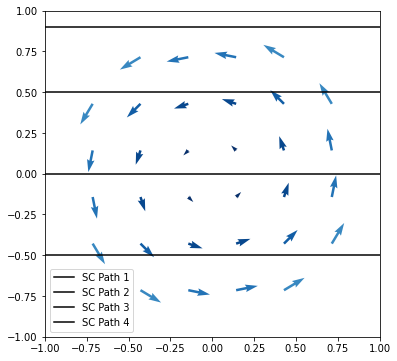

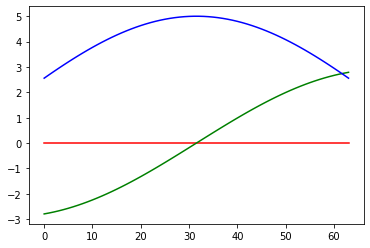

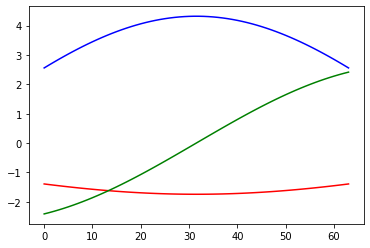

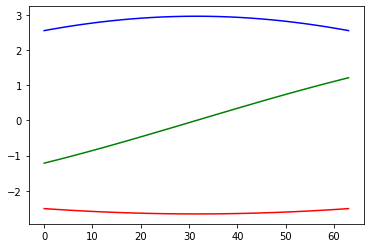

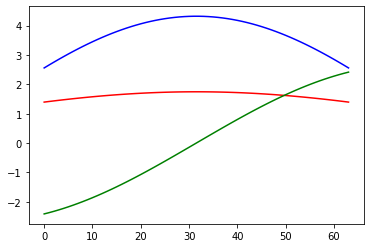

In [121]:
def lundquist(x, y, alpha, B0):
    r = np.sqrt(x ** 2 + y ** 2)
    bz = B0 * scipy.special.jv(0, alpha * r)
    bphi = B0 * scipy.special.jv(1, alpha * r)
    angle = np.arctan2(y, x)
    return -np.sin(angle) * bphi, np.cos(angle) * bphi, bz


def spacecraft_path(y0, n):
    # from x^2 + y0^2 = r0^2
    x0 = np.sqrt(radius ** 2 - y0 ** 2)
    x = np.linspace(-x0, x0, n)
    y = np.linspace(impact_parameter, impact_parameter, n)
    return x, y


plt.figure(figsize=(6, 6))
radius = 1
alpha = 1.5 * radius
B0 = 5
xx, yy = np.meshgrid(np.linspace(-radius, radius, 8), np.linspace(-radius, radius, 8))
xx = xx.flatten()
yy = yy.flatten()
distance = np.sqrt(xx ** 2 + yy ** 2)
xx = xx[distance <= radius]
yy = yy[distance <= radius]

Bx, By, Bz = lundquist(xx.flatten(), yy.flatten(), alpha=alpha, B0=B0)
plt.quiver(xx.flatten(), yy.flatten(), Bx, By, color=matplotlib.cm.Blues(Bz / Bz.max()))
plt.axhline(0, color="black", label="SC Path 1")
plt.axhline(0.5, color="black", label="SC Path 2")
plt.axhline(0.9, color="black", label="SC Path 3")
plt.axhline(-0.5, color="black", label="SC Path 4")
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.legend()
plt.show()

for impact_parameter in [0, 0.5, 0.9, -0.5]:
    x, y = spacecraft_path(impact_parameter, 64)
    Bx, By, Bz = lundquist(x, y, alpha=alpha, B0=B0)
    plt.plot(Bx, color="red")
    plt.plot(By, color="green")
    plt.plot(Bz, color="blue")
    plt.show()